In [1]:
# It is a type of unsupervised learning, so there is no label

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
np.random.choice([10,20,30,100,40],3)

array([ 20, 100, 100])

In [5]:
# it will stop, when the centroids stop updating

def kmeans(X,K,maxiters=1000):  # X are the data points have(no of trainng ex,2), k -- no of centroids
     
    centroids = X[np.random.choice(np.arange(len(X)),K),:] 
   # C=[]
    for i in range(maxiters):
        C=[]
        for x_i in X:
            distances =[]
            for y_k in centroids:
                #print(x_i.shape,y_k.shape)
                d = np.dot(x_i-y_k,x_i-y_k)  ## all the things gets positive and its an L2 distance
                distances.append(d)
            centroid = np.argmin(distances)
            
            C.append(centroid)
        C = np.array(C)
     #C = [np.argmin([np.dot(x_i-y_k,x_i-y_k)for y_k in centroids])for x_i in X]   
     #C = np.array(C)
        
        
        centroids = [ X[C==k].mean(axis=0) for k in range(K)] ## --> lets say 0-->300, 1-->300, 2 --> 400 [(300,2),(300,2),(400,2)]
        # now centroid dimension is (3,2) --> avg radius and avg weight and the VECTORIZATION is done in numpy not in python, thats why we are fetting an error
    return np.array(centroids),C

In [3]:
m1,cov1 = [9,8],[[1.5,2],[1,2]]
m2,cov2 = [5,13],[[2.5,-1.5],[-1.5,1.5]]
m3,cov3 = [3,7],[[0.25,0.5],[-0.1,0.5]]

data1 = np.random.multivariate_normal(m1,cov1,250)
data2 = np.random.multivariate_normal(m2,cov2,180)
data3 = np.random.multivariate_normal(m3,cov3,100)


X=np.vstack((data3,np.vstack((data1,data2)))) # same as concat in pandas
np.random.shuffle(X)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


In [6]:
centroids,C = kmeans(X,3)

In [46]:
centroids

array([[ 3.14041555,  6.87530531],
       [ 4.88187919, 13.1211672 ],
       [ 8.8921308 ,  7.86695705]])

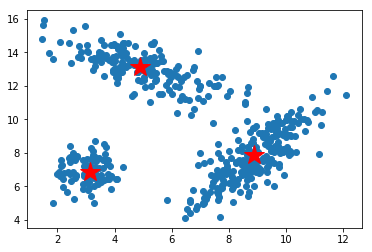

In [48]:
plt.scatter(X[:,0],X[:,-1])
plt.plot(centroids[:,0],centroids[:,-1],'r*',markersize=20)
plt.show()

In [49]:
## Instead of finding the error, we find out whats the loss in it. for loss calculate the distance between centroid and all points
## so, as far the point is away from centroid, more is loss